In [1]:
from scipy.io import loadmat
from scipy.io import savemat
from scipy import signal
import pandas as pd
import numpy as np

mdata = loadmat('dataset/sample_wave.mat')['sample_wave']

Fs = 256
t_range = np.arange(0, 4, 1/Fs)
f_range = np.arange(0, 128, 0.25)
blink_types = mdata.dtype.names # voluntary & involuntary

feature_names = [
    'fp1_mean',
    'fp1_median',
    'fp1_min',
    'fp1_max',
    'fp2_mean',
    'fp2_median',
    'fp2_min',
    'fp2_max',
    'fp1_delta_mean',
    'fp1_theta_mean',
    'fp1_alpha_mean',
    'fp1_beta_mean',
    'fp1_gamma_mean',
    'fp2_delta_mean',
    'fp2_theta_mean',
    'fp2_alpha_mean',
    'fp2_beta_mean',
    'fp2_gamma_mean',
    'blink'
]
eeg_bands = {'delta': (0, 4),
             'theta': (4, 8),
             'alpha': (8, 12),
             'beta': (12, 30),
             'gamma': (30, 45)}
features = pd.DataFrame(columns=feature_names)
features['blink'] = features['blink'].astype(int)

for blink_type in blink_types:

    signals = mdata[blink_type][0,0]
    epochs = signals.dtype.names # individual epoch struct

    for epoch in epochs:
        fp1 = signals[epoch][0,0][0]
        fp2 = signals[epoch][0,0][1]

        f, psd = signal.welch(fp1, Fs, nperseg=1024)
        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))
        fp1_delta_mean = np.mean(psd[f_delta_indices])
        fp1_theta_mean = np.mean(psd[f_theta_indices])
        fp1_alpha_mean = np.mean(psd[f_alpha_indices])
        fp1_beta_mean = np.mean(psd[f_beta_indices])
        fp1_gamma_mean = np.mean(psd[f_gamma_indices])

        f, psd = signal.welch(fp2, Fs, nperseg=1024)
        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))
        fp2_delta_mean = np.mean(psd[f_delta_indices])
        fp2_theta_mean = np.mean(psd[f_theta_indices])
        fp2_alpha_mean = np.mean(psd[f_alpha_indices])
        fp2_beta_mean = np.mean(psd[f_beta_indices])
        fp2_gamma_mean = np.mean(psd[f_gamma_indices])

        new_record = {
            'fp1_mean': np.mean(fp1),
            'fp1_median': np.median(fp1),
            'fp1_min': np.min(fp1),
            'fp1_max': np.max(fp1),
            'fp2_mean': np.mean(fp2),
            'fp2_median': np.median(fp2),
            'fp2_min': np.min(fp2),
            'fp2_max': np.max(fp2),
            'fp1_delta_mean': fp1_delta_mean,
            'fp1_theta_mean': fp1_theta_mean,
            'fp1_alpha_mean': fp1_alpha_mean,
            'fp1_beta_mean': fp1_beta_mean,
            'fp1_gamma_mean': fp1_gamma_mean,
            'fp2_delta_mean': fp2_delta_mean,
            'fp2_theta_mean': fp2_theta_mean,
            'fp2_alpha_mean': fp2_alpha_mean,
            'fp2_beta_mean': fp2_beta_mean,
            'fp2_gamma_mean': fp2_gamma_mean,
            'blink': int(1) if blink_type == 'voluntary' else int(0),
        }
        features = pd.concat([features, pd.DataFrame([new_record])], ignore_index=True)


In [2]:
features

,fp1_mean,fp1_median,fp1_min,fp1_max,fp2_mean,fp2_median,fp2_min,fp2_max,fp1_delta_mean,fp1_theta_mean,fp1_alpha_mean,fp1_beta_mean,fp1_gamma_mean,fp2_delta_mean,fp2_theta_mean,fp2_alpha_mean,fp2_beta_mean,fp2_gamma_mean,blink
0,0.019418,0.570297,-153.152054,159.161428,0.020885,0.613362,-164.717140,171.180305,37.634779,0.528774,0.504064,0.134602,0.107407,43.533272,0.611648,0.583066,0.155698,0.124240,1
1,0.035894,0.484288,-96.534364,134.752058,0.038604,0.520858,-103.824036,144.927691,19.724667,0.741313,0.358522,0.145141,0.084654,22.816111,0.857499,0.414713,0.167889,0.097922,1
2,-0.166985,1.006762,-106.343849,113.392582,-0.179595,1.082787,-114.374273,121.955281,21.425768,1.219259,0.305272,0.116558,0.081505,24.783825,1.410353,0.353118,0.134826,0.094279,1
3,-0.331847,0.188234,-105.302602,115.957580,-0.356906,0.202448,-113.254397,124.713972,40.509336,0.406582,0.297260,0.126761,0.103454,46.858358,0.470305,0.343849,0.146628,0.119668,1
4,0.019691,0.748899,-105.534091,118.844261,0.021178,0.805451,-113.503367,127.818637,24.977529,0.594918,0.409325,0.168149,0.066423,28.892254,0.688159,0.473479,0.194503,0.076834,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,-0.075876,0.393187,-80.309467,120.125675,-0.077323,0.400683,-81.840374,122.415583,34.986274,0.966050,0.649709,0.191086,0.163132,36.332847,1.003232,0.674716,0.198441,0.169411,0
857,0.293096,0.044543,-103.551569,142.618844,0.298683,0.045392,-105.525531,145.337531,20.541165,0.852161,0.282139,0.190252,0.112212,21.331765,0.884960,0.292998,0.197575,0.116531,0
858,-0.456375,1.613479,-132.117488,123.142924,-0.465074,1.644236,-134.635991,125.490349,73.344145,0.779338,0.584506,0.326723,0.123853,76.167057,0.809334,0.607003,0.339298,0.128620,0
859,-0.276722,0.266537,-69.893409,79.104371,-0.281997,0.271618,-71.225759,80.612306,23.675377,0.608349,0.430466,0.237088,0.153009,24.586609,0.631763,0.447034,0.246213,0.158898,0


In [3]:
print(features.dtypes)

fp1_mean          float64
fp1_median        float64
fp1_min           float64
fp1_max           float64
fp2_mean          float64
fp2_median        float64
fp2_min           float64
fp2_max           float64
fp1_delta_mean    float64
fp1_theta_mean    float64
fp1_alpha_mean    float64
fp1_beta_mean     float64
fp1_gamma_mean    float64
fp2_delta_mean    float64
fp2_theta_mean    float64
fp2_alpha_mean    float64
fp2_beta_mean     float64
fp2_gamma_mean    float64
blink               int64
dtype: object


In [4]:
train_x = features.loc[:, features.columns != 'blink']
train_y = features.loc[:, features.columns == 'blink']

In [5]:
from sklearn import preprocessing

def normalize_mms(input_df):
    scaler = preprocessing.MinMaxScaler()
    result = scaler.fit_transform(input_df)
    return pd.DataFrame(result, index=input_df.index, columns=input_df.columns)

train_x = normalize_mms(train_x)
train_x
train_y

,blink
0,1
1,1
2,1
3,1
4,1
...,...
856,0
857,0
858,0
859,0


Train acc: 0.7136627906976745
[[200 113]
 [ 84 291]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       313
           1       0.72      0.78      0.75       375

    accuracy                           0.71       688
   macro avg       0.71      0.71      0.71       688
weighted avg       0.71      0.71      0.71       688


Test acc: 0.653179190751445
[[54 27]
 [33 59]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        81
           1       0.69      0.64      0.66        92

    accuracy                           0.65       173
   macro avg       0.65      0.65      0.65       173
weighted avg       0.66      0.65      0.65       173



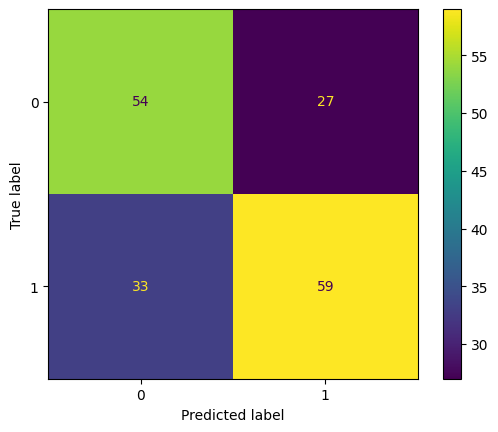

In [6]:
import sys
sys.path.append("../../function")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from function import classification

LR = LogisticRegression(random_state=42)
LR = classification.model_training(train_x, train_y.values.ravel(), LR)

C:\Users\Edwin Sanjaya\DataspellProjects\bci-finalproject\function\classification.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train acc: 1.0
[[313   0]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Test acc: 0.7283236994219653
[[57 24]
 [23 69]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71        81
           1       0.74      0.75      0.75        92

    accuracy                           0.73       173
   macro avg       0.73      0.73      0.73       173
weighted avg       0.73      0.73      0.73       173



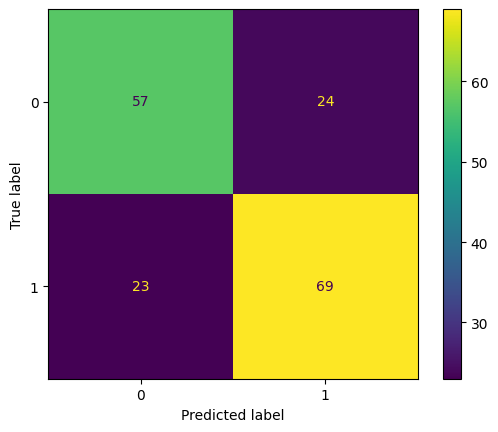

In [7]:
RF = RandomForestClassifier(random_state=42)
RF = classification.model_training(train_x, train_y, RF)